In [1]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold




#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix



#Miscellaneous Utilitiy Libraries--------------------------------------


In [2]:
df = pd.read_csv('Porto1.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# EDA I

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
# check unique values
columns = df.columns.tolist()
columns

for i in columns:
    print(i,':')
    print(df[i].unique())

ID :
[    1     2     3 ... 10997 10998 10999]
Warehouse_block :
['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment :
['Flight' 'Ship' 'Road']
Customer_care_calls :
[4 2 3 5 6 7]
Customer_rating :
[2 5 3 1 4]
Cost_of_the_Product :
[177 216 183 176 184 162 250 233 150 164 189 232 198 275 152 227 143 239
 145 161 156 211 251 225 172 234 266 257 223 149 137 181 215 269 139 174
 151 210 169 160 190 141 165 170 203 246 238 193 221 179 105 261 202 109
 158 231 206 187 230 113 180 132 217 197 185 278 229 186 286 175 219 213
 235 271 144 218 263 168 265 205 252 222 220 147 200 224 247 280 157 207
 237 264 248 191 146 135  98  97 114 112 274 166 148 270 242 192 116 255
 209 134 130 133 140 136 142 154 155 127 129 159 294 226 258 241 208 182
 115 212 171 249 243 163 272 138 273 279 173 194 262 201 260 188 267 131
 122 103 199 236 167 259 178 123 124  96 244 254 128 204 245 228 268 108
 276 214 281 253 104 240 121 153 111 117 195 110 119 196 291 118 283 100
 256 285 284 101 296 277 106 282 126 102 120  99 12

In [7]:
# check unique values
columns2 = df[['Gender','Warehouse_block','Customer_rating','Mode_of_Shipment','Product_importance']]
columns2

for i in columns2:
    #print(i,':')
    print(df[i].value_counts(),end='/n')

Gender
F    5545
M    5454
Name: count, dtype: int64/nWarehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64/nCustomer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64/nMode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64/nProduct_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64/n

In [8]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

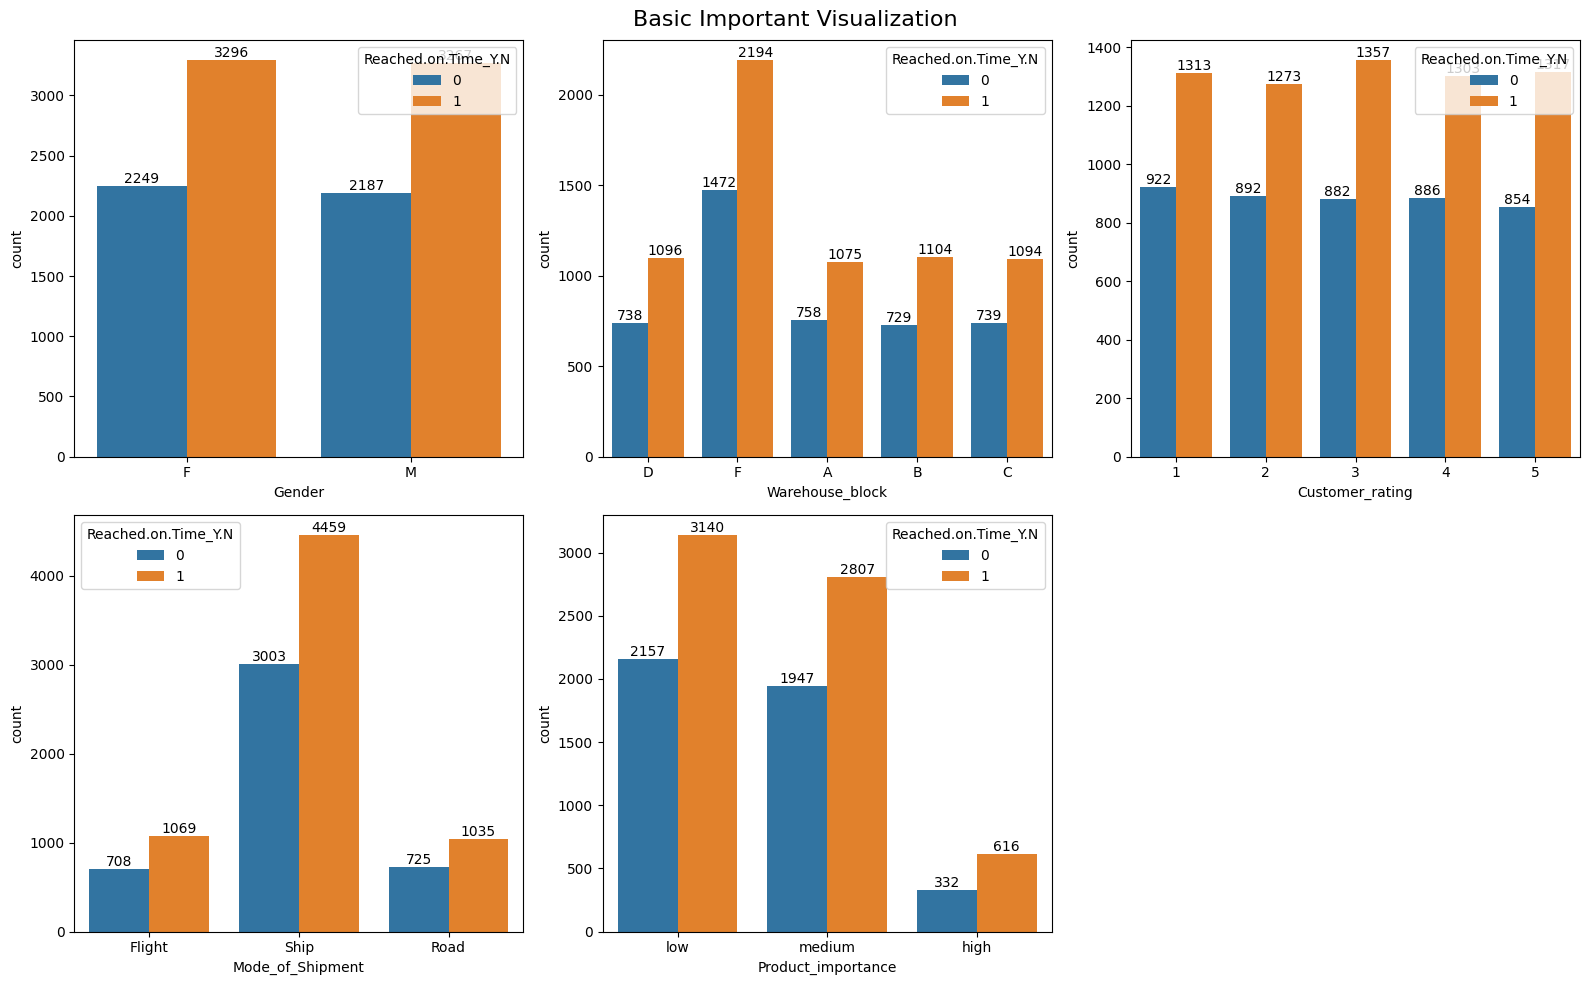

In [9]:
# Create Visualization

# Initiate figure
plt.figure(figsize=(16,10))

# Create title
plt.suptitle('Basic Important Visualization', fontsize=16)

# Create iterate Plot
for i in range (columns2.shape[1]):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(data=df,
                      x= columns2.columns[i],
                      hue=df['Reached.on.Time_Y.N'])
    for x in ax.containers:
        ax.bar_label(x, label_type='edge')
plt.tight_layout()
plt.show()

Insight :
* Customer perempuan cenderung memiliki barang yang lebih ontime jika dibandingkan dengan laki-laki
* Warehouse blok F merupakan warehouse dengan pengambilan barang terbesar, yang sebanding dengan tingginya tingkat telatnya barang
* Barang dengan rating 3 memiliki tingkat keterlambatan paling tinggi, bahkan lebih tinggi dibandingkan barang dengan rating 1
* Jenis pengiriman paling banyak menggunakan kapal laut, sebanding dengat banyaknya jumlah keterlambatan pengiriman
* Kategori produk low merupakan barang yang paling sering dikirim, juga paling tinggi jumlah keterlambatannya

# Data Preprocessing

In [10]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
# make column name lower

for x in df.columns:
    df.rename(columns={x : x.lower()}, inplace=True)
    
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [13]:
# Check outliers

outliers = df.select_dtypes(include=['int64'])
outliers.head()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [14]:
outliers = outliers.drop(columns=['id','reached.on.time_y.n'])
outliers.head()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


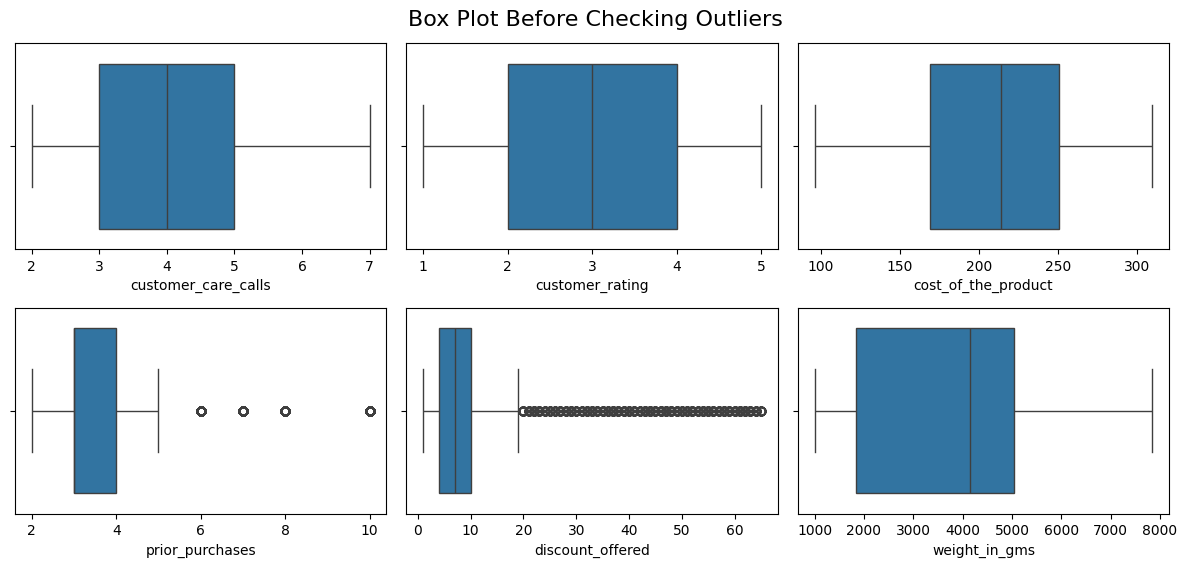

In [15]:
# Create figure

plt.figure(figsize=(12,8))

# Create Suptitle
plt.suptitle('Box Plot Before Checking Outliers', fontsize=16)

# Create plot

for i in range(outliers.shape[1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,
                x = outliers.columns[i])
    
plt.tight_layout()
plt.show()

In [16]:
df = df[df['discount_offered'] < 15]

In [17]:
df = df[df['prior_purchases'] <=5 ]
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1


In [18]:
df.shape

(7748, 12)

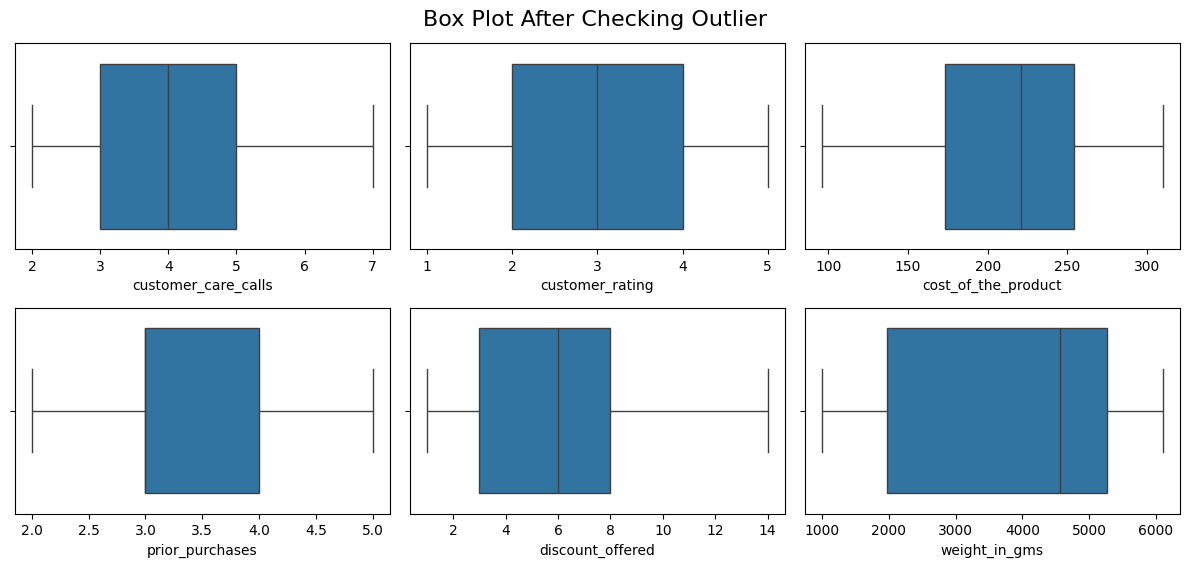

In [19]:
# Check Outlier Again

# Create Figure
plt.figure(figsize=(12,8))

# Create Suptitle
plt.suptitle('Box Plot After Checking Outlier', fontsize=16)

# Create Plot
for i in range (outliers.shape[1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,
                x = outliers.columns[i])
plt.tight_layout()
plt.show()


In [20]:
columns3 = df[['gender','warehouse_block','customer_rating','mode_of_shipment','product_importance','customer_care_calls']]

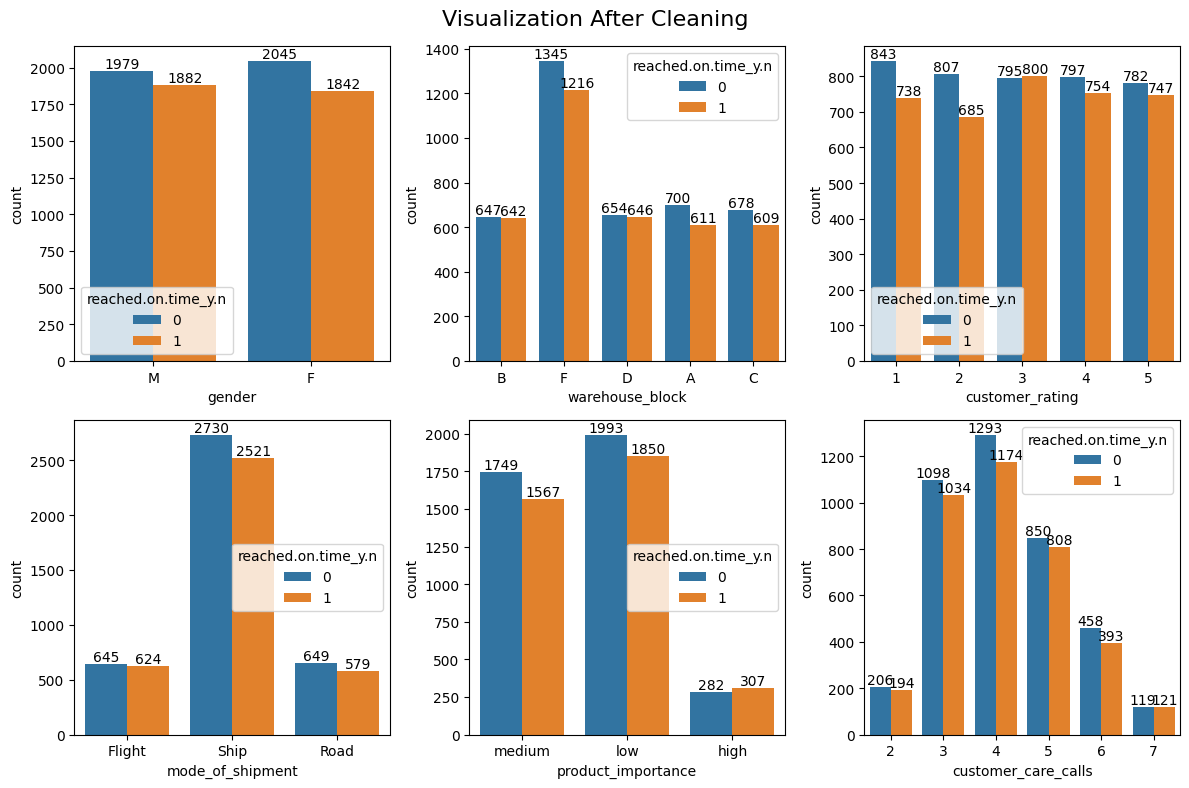

In [21]:
# Create Visualization Again After Remove

# Create figure
plt.figure(figsize=(12,8))

# Create Suptitle
plt.suptitle('Visualization After Cleaning', fontsize=16)

# Create Iteration
for i in range(columns3.shape[1]):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(data=df,
                       x = columns3.columns[i],
                       hue=df['reached.on.time_y.n'])
    for x in ax.containers:
        ax.bar_label(x, label_type='edge')

plt.tight_layout()
plt.show()

Insight Baru:
* Berdasarkan gender, Wanita lebih banyak menerima barang tepat waktu sama seperti sebelum dicleaning
* Blok F merupakan blok dengan pengambilan barang terbanyak, terjadi perubahan dimana tadinya lebih banyak barang telat sekarang menjadi lebih banyak on time. Hal ini juga terjadi di blok lain
* Barang dengan rating 3 masih memiliki tingkat keterlambatan yang lebih tinggi jika dibandingkan dengan tingkat ontime. Hal ini hanya terjadi pada barang rating bintang 3
* Pengiriman dengan menggunakan kapal masih menjadi pengiriman dengan jumlah terbanyak, sekarang semua jenis pengiriman memiliki tingkat ontime yang lebih tinggi jika dibandingkan dengan tingkat keterlambatan
* Tingkatan produk low dan medium memiliki tingkat ontime yang lebih tinggi dibandingkan dengan tingkat keterlambatan. Hanya produk dengan tingkatan high yang memiliki tingkat keterlambatan lebih tinggi dibandingkan dengan tingkat ontime
* Customer call dengan jumlah 7 memiliki tingkat ontime yang lebih rendah dibandingkan dengan customer call dengan jumlah 2-6

In [22]:
# Export for Data Visualization in Goole Looker Studio
df.to_csv('Porto1_Visualisasi.csv', index=False)

In [23]:
# Check nunique

for i in (df.columns):
    print(i,':')
    print(df[i].nunique())

id :
7748
warehouse_block :
5
mode_of_shipment :
3
customer_care_calls :
6
customer_rating :
5
cost_of_the_product :
215
prior_purchases :
4
product_importance :
3
gender :
2
discount_offered :
14
weight_in_gms :
3055
reached.on.time_y.n :
2


# Label Encoding

In [24]:
df_encode = df.copy()

In [25]:
df_encode.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1


In [26]:
# Encode mode shipment
df_encode['mode_of_shipment'] = df_encode['mode_of_shipment'].map({
    'Flight' : 1,
    'Ship' : 2,
    'Road' : 3
})

# Encode warehouse block
df_encode['warehouse_block'] = df_encode['warehouse_block'].map({
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'F' : 5
})
# Encode product importance
df_encode['product_importance'] = df_encode['product_importance'].map({
    'high' : 1,
    'medium' : 2,
    'low' : 3
})

# Encode gender
df_encode['gender'] = df_encode['gender'].map({
    'M' : 1,
    'F' :0
})

In [27]:
df_encode.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
3,4,2,1,3,3,176,4,2,1,10,1177,1
5,6,5,1,3,1,162,3,2,0,12,1417,1
6,7,4,1,3,4,250,3,3,0,3,2371,1
8,9,1,1,3,4,150,3,3,0,11,1861,1
10,11,3,1,3,4,189,2,2,1,12,2888,1


In [28]:
for x in (df_encode.columns):
    print(x)
    print (df_encode[x].unique())

id
[    4     6     7 ... 10996 10997 10999]
warehouse_block
[2 5 4 1 3]
mode_of_shipment
[1 2 3]
customer_care_calls
[3 2 4 5 6 7]
customer_rating
[3 1 4 5 2]
cost_of_the_product
[176 162 250 150 189 198 143 156 211 234 210 190 203 158 231 187 230 197
 278 175 271 144 218 263 222 168 157 237 220 274 185 192 255 140 139 148
 116 133 142 145 127 147 264 209 181 270 183 163 165 141 201 188 131 159
 135 103 169 173 178 205 166 200 194 226 244 235 216 199 177 160 174 215
 206 261 228 245 229 236 179 260 224 253 240 105 202 164 249 242 138 146
 227 241 170 151 281 111 223 195 259 114 257 186 251 232 279 121 119 161
 212 258 153 208 113  96 243 136 254 167 193 152 268 262 265 171 191 246
 184 247 221 275 110 214 252 134 256 118 180 238 100 123 225 182 233 137
 248 286 109 213 269 217 219 155 172 266 280 273 239 204 132 154 196 120
 126 207 125 104 107 276 149 277 272 129 296 301 117 267 102 282 108 290
 106  98 124 122 101 291 310 308 112 300 303 285 284 306 292 293 295 294
 130 304 283 298 

In [29]:
# drop id
df_encode = df_encode.drop(columns='id')
df_encode.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
3,2,1,3,3,176,4,2,1,10,1177,1
5,5,1,3,1,162,3,2,0,12,1417,1
6,4,1,3,4,250,3,3,0,3,2371,1
8,1,1,3,4,150,3,3,0,11,1861,1
10,3,1,3,4,189,2,2,1,12,2888,1


# Checking Correlation

In [30]:
# Define correlation matrix
corr_matrix = df_encode.corr()
corr_matrix

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
warehouse_block,1.000000,0.005527,0.015314,0.013737,-0.011752,-0.004635,0.004046,-0.009561,-0.004715,0.010826,0.001231
mode_of_shipment,0.005527,1.000000,-0.005767,0.007039,0.005447,-0.016932,0.007309,-0.013446,-0.018965,0.013455,-0.011510
customer_care_calls,0.015314,-0.005767,1.000000,0.015065,0.374920,0.351015,0.086766,-0.005486,-0.004340,-0.449541,-0.003673
customer_rating,0.013737,0.007039,0.015065,1.000000,0.007032,0.003980,0.000421,0.003182,-0.003932,-0.004927,0.019851
cost_of_the_product,-0.011752,0.005447,0.374920,0.007032,1.000000,0.257664,0.056836,0.014392,-0.006107,-0.362148,-0.001238
prior_purchases,-0.004635,-0.016932,0.351015,0.003980,0.257664,1.000000,0.082440,-0.010447,-0.003431,-0.492215,-0.029614
product_importance,0.004046,0.007309,0.086766,0.000421,0.056836,0.082440,1.000000,0.006344,0.020046,-0.111118,-0.008626
gender,-0.009561,-0.013446,-0.005486,0.003182,0.014392,-0.010447,0.006344,1.000000,-0.007413,0.001185,0.013561
discount_offered,-0.004715,-0.018965,-0.004340,-0.003932,-0.006107,-0.003431,0.020046,-0.007413,1.000000,-0.054708,0.036123
weight_in_gms,0.010826,0.013455,-0.449541,-0.004927,-0.362148,-0.492215,-0.111118,0.001185,-0.054708,1.000000,-0.113990


<Axes: >

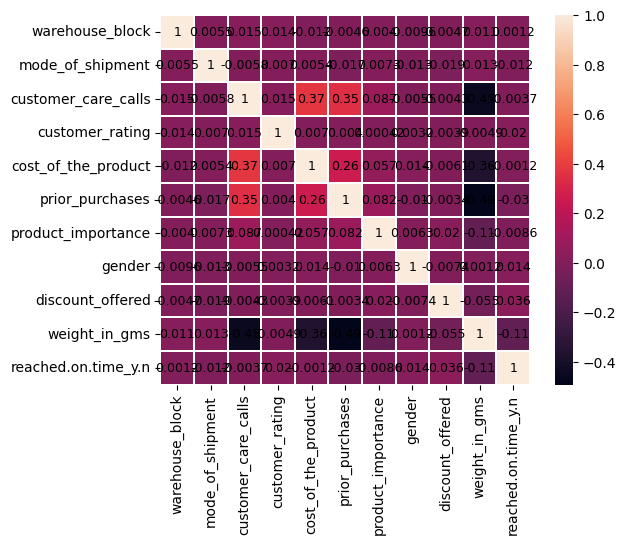

In [31]:
# plot the heatmap
sns.heatmap(
    data = corr_matrix,
    annot_kws = {
        "size": 9,
        "color": "black"
    },
    annot=True,
    square=True,
    linewidths=0.1)

In [32]:
df_num_corr = df_encode.corr()['reached.on.time_y.n'][:-1]

high_corr_mask = abs(df_num_corr) >= 0.01
high_feature_list = df_num_corr[high_corr_mask].sort_values(ascending=False)

print(high_feature_list)

discount_offered    0.036123
customer_rating     0.019851
gender              0.013561
mode_of_shipment   -0.011510
prior_purchases    -0.029614
weight_in_gms      -0.113990
Name: reached.on.time_y.n, dtype: float64


# Drop the column that low correlation

In [33]:
df_encode = df_encode.drop(columns=['gender','warehouse_block','customer_care_calls',
                                     'cost_of_the_product','product_importance'])
df_encode.head()

,mode_of_shipment,customer_rating,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n
3,1,3,4,10,1177,1
5,1,1,3,12,1417,1
6,1,4,3,3,2371,1
8,1,4,3,11,1861,1
10,1,4,2,12,2888,1


# Machine Learning Preparation

## Split Data set

In [34]:
# Split into X dan y
X = df_encode.drop(columns='reached.on.time_y.n')
y = df_encode['reached.on.time_y.n']

In [35]:
from collections import Counter

In [36]:
Counter(y)

Counter({0: 4024, 1: 3724})

## Generate Train Split Test

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [38]:
print('y_train:', Counter(y_train))
print('y_test:', Counter(y_test))

y_train: Counter({0: 3199, 1: 2999})
y_test: Counter({0: 825, 1: 725})


## Modeling & Scaling with Pipeline

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report # model evaluasi

In [40]:
pipe_XGboost = make_pipeline(StandardScaler(),XGBClassifier(use_label_encoder=False,eval_metric='logloss'))
pipe_randomforest = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe_logisticregressions= make_pipeline(StandardScaler(),LogisticRegression())

## Training Model

### XGboost

In [41]:
print("X_train type:", type(X_train))
print("X_train shape:", X_train.shape)
print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)

X_train type: <class 'pandas.core.frame.DataFrame'>
X_train shape: (6198, 5)
y_train type: <class 'pandas.core.series.Series'>
y_train shape: (6198,)


In [42]:
pipe_XGboost.fit(X_train,y_train)
y_pred = pipe_XGboost.predict(X_test)

print('Hasil model XGboost :')
print(classification_report(y_test,y_pred))


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [51]:
import numpy as np
print("Numpy version:", np.__version__)



Numpy version: 2.2.0


### Random Forest

In [82]:
pipe_randomforest.fit(X_train,y_train)
y_pred = pipe_randomforest.predict(X_test)

print('Hasil model random fosest :')
print(classification_report(y_test,y_pred))

Hasil model random fosest :
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       825
           1       0.51      0.52      0.52       725

    accuracy                           0.54      1550
   macro avg       0.54      0.54      0.54      1550
weighted avg       0.54      0.54      0.54      1550



### Logistic Regression

In [83]:
pipe_logisticregressions.fit(X_train,y_train)
y_pred = pipe_logisticregressions.predict(X_test)

print('Hasil model logistic regression :')
print(classification_report(y_test,y_pred))

Hasil model logistic regression :
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       825
           1       0.53      0.50      0.51       725

    accuracy                           0.56      1550
   macro avg       0.56      0.56      0.56      1550
weighted avg       0.56      0.56      0.56      1550



## Model Tuning

### Random Forest

In [84]:
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto','sqrt','log2']
}

In [85]:
# Using GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy')

In [86]:
# Fit into training data
grid_search.fit(X_train,y_train)

# Evaluate best model & Hyperparameters
best_model = grid_search.best_estimator_

print(best_model)

c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       n_estimators=200)


### Logistic Regression

In [88]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

In [89]:
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring='accuracy')

In [90]:
# Fit to Training
grid_search.fit(X_train,y_train)

# Evaluate best model & hyperparameter
best_model = grid_search.best_estimator_

print(best_model)

c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(C=10, solver='liblinear')


c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### XGBoost

In [91]:
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [92]:
grid_search = GridSearchCV(XGBClassifier(), param_grid,cv=5,scoring='accuracy')

In [93]:
# Fit to training
grid_search.fit(X_train,y_train)

# Evaluate best model & hyperparameter
best_model = grid_search.best_estimator_

best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## After Tuning

### With pipeline

In [94]:

pipe_XGboost_tuning = make_pipeline(StandardScaler(),XGBClassifier(max_depth=3,
                                                                   learning_rate=0.01,
                                                                   n_estimators=200,
                                                                   cosample_bytree=1))
pipe_randomforest_tuning = make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=5,
                                                                                 max_features='log2',
                                                                                 min_samples_leaf=2,
                                                                                n_estimators=200))
pipe_logisticregressions_tuning = make_pipeline(StandardScaler(),LogisticRegression(C=10,
                                                                                    solver='liblinear'))

### XGBoost

In [96]:
pipe_XGboost_tuning.fit(X_train,y_train)
y_pred = pipe_XGboost_tuning.predict(X_test)

print('Hasil model XGboost :')
print(classification_report(y_test,y_pred))

Hasil model XGboost :
              precision    recall  f1-score   support

           0       0.58      0.96      0.72       825
           1       0.81      0.21      0.34       725

    accuracy                           0.61      1550
   macro avg       0.69      0.58      0.53      1550
weighted avg       0.69      0.61      0.54      1550



c:\Users\imad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cosample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


### Random Forest

In [97]:
pipe_randomforest_tuning.fit(X_train,y_train)
y_pred = pipe_randomforest_tuning.predict(X_test)

print('Hasil model random fosest :')
print(classification_report(y_test,y_pred))

Hasil model random fosest :
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       825
           1       0.74      0.25      0.37       725

    accuracy                           0.61      1550
   macro avg       0.66      0.59      0.54      1550
weighted avg       0.66      0.61      0.55      1550



### Logistic Regression

In [98]:
pipe_logisticregressions_tuning.fit(X_train,y_train)
y_pred = pipe_logisticregressions_tuning.predict(X_test)

print('Hasil model logistic regression :')
print(classification_report(y_test,y_pred))

Hasil model logistic regression :
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       825
           1       0.53      0.50      0.51       725

    accuracy                           0.56      1550
   macro avg       0.56      0.56      0.56      1550
weighted avg       0.56      0.56      0.56      1550



# Save Model

In [99]:
import pickle

In [100]:
with open ('Model_XGBoost2.sav','wb') as model_file:
    pickle.dump(pipe_XGboost_tuning,model_file)

In [101]:
with open ('Model_XGBoost2.pkl','wb') as model_file:
    pickle.dump(pipe_XGboost_tuning,model_file)

# Load Model & Test 

In [102]:
with open ('Model_XGboost2.pkl','rb') as model_file:
    loaded_model = pickle.load(model_file)

In [103]:
df_encode.tail()

,mode_of_shipment,customer_rating,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n
10992,2,1,5,3,1906,0
10994,2,1,5,1,1538,1
10995,2,1,5,6,1247,0
10996,2,4,5,4,1155,0
10998,2,5,5,6,1639,0


In [104]:
X.head()

,mode_of_shipment,customer_rating,prior_purchases,discount_offered,weight_in_gms
3,1,3,4,10,1177
5,1,1,3,12,1417
6,1,4,3,3,2371
8,1,4,3,11,1861
10,1,4,2,12,2888


In [111]:
test_data = [[1,3,1,5,500]]
test_data = pd.DataFrame(test_data, columns=X.columns)

prediction = loaded_model.predict(test_data)
print(prediction)

if(prediction[0] == 1):
    print('your product will come Late')
else:
    print('your product will come ontime')

[1]
your product will come Late
